In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms.v2 as TF
from torchviz import make_dot

import numpy as np
from PIL import Image
import cv2

# To use pretrained segmentation models (implement in PyTorch)
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.encoders import get_preprocessing_fn

# visualization
import matplotlib.pyplot as plt
from pprint import pprint


# OS/File/Path management
import os
import sys

# load my custom written Classes/Functions/etc.
from utils.models.unet import UnetScratch

In [2]:
print('PyTorch ver:', torch.__version__)

# force pytorch to use GPU
# use "model.to(device)" later on to force a model use Cuda GPU
print('Can I use GPU?', torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device used for calculation (CPU\Cuda):', device)

PyTorch ver: 2.0.1+cu118
Can I use GPU? True
Device used for calculation (CPU\Cuda): cuda:0


# Create Dataset

In [ ]:
class CrackDataset(Dataset):
    def __init__(self, img_dir: str, mask_dir: str, transform: bool = None):
        super().__init__()
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform





# Define Model(s)

## Import a Pretrained Segmentaion model (e.g., UNET)

In [4]:
# the downloaded model are located in "~/.cache/torch/hub/checkpoints/"
# backbone_model_name = 'resnet152'
backbone_model_name = 'mobilenet_v2'

# Segmentation model is just a PyTorch nn.Module
# model = smp.FPN(
model = smp.Unet(
    encoder_name=backbone_model_name,        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7 
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)

# load preprocessing func of the loaded model, so our data goes through the same transformation
preprocess_input = get_preprocessing_fn(backbone_model_name, pretrained='imagenet')

### Visualize the architecture

In [5]:
# the attribs of the model
# vars(model)


# plot the model arch
# create a dumy channels_first img (m, C, H, W)
x = torch.zeros(1, 3, 224, 224, dtype=torch.float, requires_grad=False)
yhat = model(x)

make_dot(yhat, params=dict(list(model.named_parameters()))).render("./outputs/model_architecture/Unet_pretrained", format="png")

'outputs/model_architecture/Unet_pretrained.png'

## Load a Segmentation Model (i.e., UNET), written from scratch

In [2]:
model = UnetScratch(in_channels=3, num_classes=1)

img shape: (572, 572)
torch.float32


UnboundLocalError: cannot access local variable 'skip_connections_cropped' where it is not associated with a value

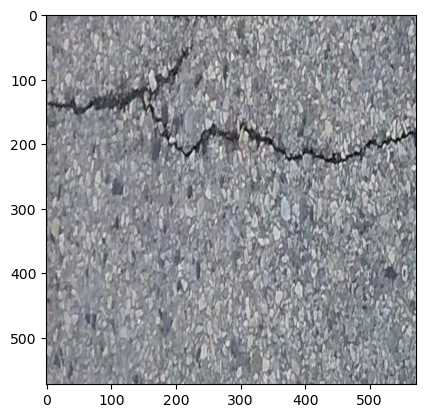

In [5]:
img_addr = os.path.join('images', '') + '20160222_081011_1_721.jpg'
img = Image.open(img_addr).resize((572, 572))
plt.imshow(img)

print('img shape:', img.size)

img_tensor = (TF.functional.pil_to_tensor(img) / 127.5 - 1)
print(img_tensor.dtype)

yhat = model(img_tensor.unsqueeze(dim=0))

In [4]:
print(yhat)
plt.imshow(yhat[0].moveaxis(0, -1))

NameError: name 'yhat' is not defined

(212, 237, 4)
[[[0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  ...
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]]

 [[0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  ...
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]]

 [[0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  ...
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.        ]]

 ...

 [[0.49803922 0.49803922 0.49803922 1.        ]
  [0.49803922 0.49803922 0.49803922 1.      

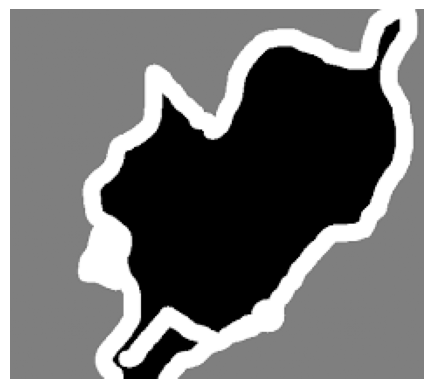

In [23]:
img_addr = os.path.join('images', '') + 'cat_mask.png'
img = plt.imread(img_addr)

print(img.shape)
print(img)
print('#classes:', len(np.unique(np.argmax(img, axis=-1))))
plt.imshow(img)
plt.axis('off')
plt.show()

# 